In [187]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

# Homework 3: Ultimate Pandas
### Due **Monday Feb 5th** 11:59 pm

In this homework, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.


In [188]:
import numpy as np
import pandas as pd
import autograder_tools as at
%matplotlib inline
import matplotlib.pyplot as plt

## Point Breakdown (70 pts total)
- 1a 5 pts
- 1b 5 pts
- 1c 10 pts
- 1d 10 pts
- 1e 20 pts
- 1f 10 pts
- 1g 10 pts


## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>



We will focus on Bangladesh, examining how changes in life expectancy, fertility, and child mortality have changed over time and contributed to the rate of population growth.

To begin, load `population.csv` into a Pandas DataFrame named `population`.

In [189]:
population = pd.read_csv('population.csv')
population.head(3)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000


### Question 1a: Examining data from Bangladesh (5pts)

[Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` data frame, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

---
Index the `population` dataframe with the following constraints for rows and columns. Assign the resulting indexed dataframe to `b_pop`:

`b_pop` should consist of those `population` rows where:
 1. `geo` tag corresponds to 3 letter code for Bangladesh
 2. `time` is greater than or equal to 1970
 3. `time` is less than or equal to 2020

*Hint:* You can select rows using multiple truth indices:<br>
`A[(A['x']>2) & (A['y']>7)]` returns rows where the `'x'` column has values greater than 2 and `'y'` column values greater than 7.
 <br><br>
`b_pop` columns should be the `time` and `population_total` columns from the `population` dataframe.  

Make a plot of the Bangladesh population over time, with `population` on the vertical axis and `year` on the horizontal axis.

In [190]:
bgd_data = population[(population['geo'] == 'bgd') & 
                   (population['time'] >= 1970) & 
                   (population['time'] <= 2020)]
b_pop = bgd_data[['time', 'population_total']]
b_pop.head(3)

,time,population_total
4685,1970,64232486
4686,1971,65531635
4687,1972,66625706


Text(0.5, 1.0, 'Population of Bangladesh 1970-2020')

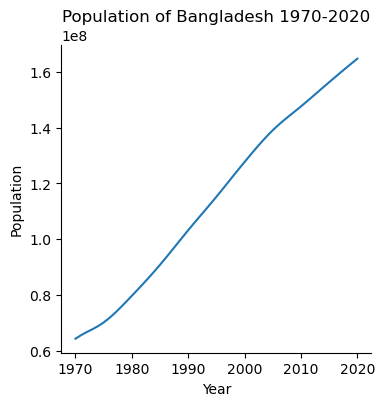

In [191]:
fig = plt.figure()
fig.set_size_inches(4,4)
ax1 = fig.add_subplot(111)

ax1.plot(b_pop['time'], b_pop['population_total'])

ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
ax1.spines[['top','right']].set_visible(False)
ax1.set_title('Population of Bangladesh 1970-2020')

In [192]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b (5 pts) 

1. Calculate the year-to-year difference for the Bangladesh population from 1970 to 2020 using `np.diff()`, which returns the differences between consecutive values in an input series/array. Assign the resulting array of differences to the variable `pop_diff`.
2. Plot `pop_diff` over time.
3. Assign your plot to the variable `pop_diff_plot` *(Ex: `pop_diff_plot = ax.plot(...)`).*

**Hints:**
- `pop_diff` will have onw less row than `b_pop['time']`. 

- When plotting, x and y values must have the same shape. Because the x values (time) will have 1 more row than y vals (`pop_diff`), you need to index the x values starting from the 2nd row to even the shape out.  




Text(0.5, 1.0, 'Change in Population of Bangladesh 1970-2020')

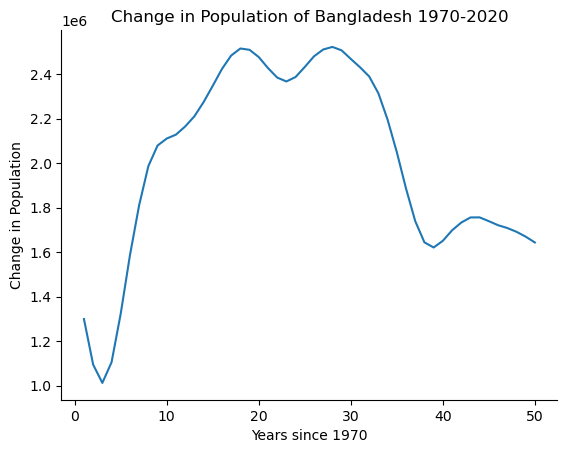

In [193]:
pop_diff = np.diff(b_pop['population_total'])
fig=plt.figure()
ax=fig.add_subplot(111)
# Assign your plot to this variable, pop_diff_plot

pop_diff_plot = ax.plot(range(1,len(b_pop['time'])), pop_diff)
ax.set_xlabel('Years since 1970')
ax.set_ylabel('Change in Population')
ax.spines[['top','right']].set_visible(False)
ax.set_title('Change in Population of Bangladesh 1970-2020')

In [194]:
grader.check("q1b")

q1b results: All test cases passed!

Your plot should show that the rate of population growth in Bangladesh increased from roughly 1975 to 1985, was stable from 1985-2000, and then began to decrease dramatically from 2000-2020. To consider why this might be the case, we will consider simultaneous trends in life expectancy, child mortality, and fertility. To do this, we will load three other datasets into Pandas DataFrames. 
- `life_expectancy.csv` has data on *life expectancy*, which measures how long someone would live, on average, if the mortality conditions in that year persisted throughout their lifetime. These mortality conditions describe what fraction of people at each age survived the year.
- `fertility.csv` has data on *fertility*, a number describing the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current birth rates persisted throughout her child bearing years.
- `child_mortality.csv` contains data about the average number (per 1000 births) of children that die between the age of 0 and 5. 

In [195]:
life_expectancy = pd.read_csv('life_expectancy.csv')
child_mortality = pd.read_csv('child_mortality.csv')
fertility =pd.read_csv('fertility.csv')

In [196]:
life_expectancy

,geo,time,life_expectancy_years
0,afg,1800,28.21
1,afg,1801,28.20
2,afg,1802,28.19
3,afg,1803,28.18
4,afg,1804,28.17
...,...,...,...
56125,zwe,2096,75.12
56126,zwe,2097,75.25
56127,zwe,2098,75.38
56128,zwe,2099,75.52


In [197]:
life_expectancy.rename(columns={'life_expectancy_years':'life_expectancy'},inplace=True)
life_expectancy.head()

,geo,time,life_expectancy
0,afg,1800,28.21
1,afg,1801,28.20
2,afg,1802,28.19
3,afg,1803,28.18
4,afg,1804,28.17


In [198]:
child_mortality.rename(columns={'child_mortality_0_5_year_olds_dying_per_1000_born':'mortality'},inplace=True)
child_mortality.head()

,geo,time,mortality
0,afg,1800,468.58
1,afg,1801,468.58
2,afg,1802,468.58
3,afg,1803,468.58
4,afg,1804,468.58


In [199]:
fertility.rename(columns={'children_per_woman_total_fertility':'fertility'},inplace=True)
fertility.head()

,geo,time,fertility
0,abw,1800,5.64
1,abw,1801,5.64
2,abw,1802,5.64
3,abw,1803,5.64
4,abw,1804,5.64


### Question 1c (10 pts)
Perhaps population is growing more slowly because people aren't living as long.  

Use the `life_expectancy` DataFrame to plot the life expectancy between the years 1970 and 2020 (inclusive) in Bangladesh.

1. Assign your plot to the variable `life_expectancy_plot`.
2. Assign the net difference in life expectancy from 1970 to 2020 to the variable `diff_in_life_expectancy`. An increase in life expectancy should be a positive value.<br>
*Hint*  One way to compute this difference is to extract two Pandas series, corresponding to 1970 and 2020 life expectancy. Then convert each to a floating point number (e.g.
`float(...)` and then compute difference.



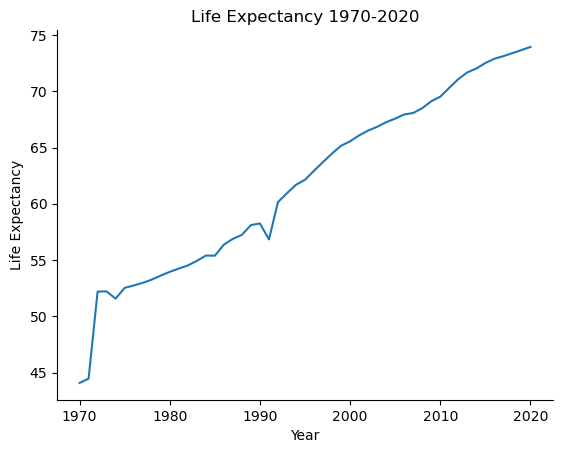

In [200]:
fig=plt.figure()
ax=fig.add_subplot(111)

b_life_expectancy = life_expectancy[(life_expectancy['geo'] == 'bgd') & 
                   (life_expectancy['time'] >= 1970) & 
                   (life_expectancy['time'] <= 2020)]
life_expectancy_plot = ax.plot(b_life_expectancy['time'], b_life_expectancy['life_expectancy'])

ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy')
ax.spines[['top','right']].set_visible(False)
ax.set_title('Life Expectancy 1970-2020')

life_expectancy_1970 = float(b_life_expectancy[b_life_expectancy['time'] == 1970]['life_expectancy'].iloc[0])
life_expectancy_2020 = float(b_life_expectancy[b_life_expectancy['time'] == 2020]['life_expectancy'].iloc[0])
diff_in_life_expectancy = life_expectancy_2020 - life_expectancy_1970

In [201]:
##### grader.check("q1c")

In [202]:
grader.check("q1c")

q1c results: All test cases passed!

**Follow-up question (ungraded)**: Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh? Why or why not? 

Note: The drop in life expectancy in 1991 was due to the [deadliest cyclone on record](https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone). 

No, the life expectency increased and so therefore does not directly explain why the population growth rate decreased.

### Question 1d (10 pts)
Another possibility is that changes in fertility are contributing to population changes.

Write a function `data_over_time` that takes four inputs (listed in order):
- `country_code`, the Alpha-3 code of any country (string).
- `start`, the first year of interest (integer).
- `end`, the last year of interest (integer).
- `df`, the name of an input DataFrame (such as `fertility`).

The function should filter the input DataFrame to select rows which meet the following two constraints.  
1. The `geo` column matches `country_code`.  
2. The `time` column has values in the range [start, end]  -- including start and end values.  

The function should return these rows from the last two columns of the input data frame but remove the first column (country code)

**The function should return this filtered dataframe.**



Call this function to make a plot of how Bangladesh's fertility rate has changed between 1970 and 2020. Assign your plot to the variable `fertility_plot`. Note that the function `data_over_time` should not make or return the plot itself. 


Text(0.5, 1.0, 'Fertility 1970-2020')

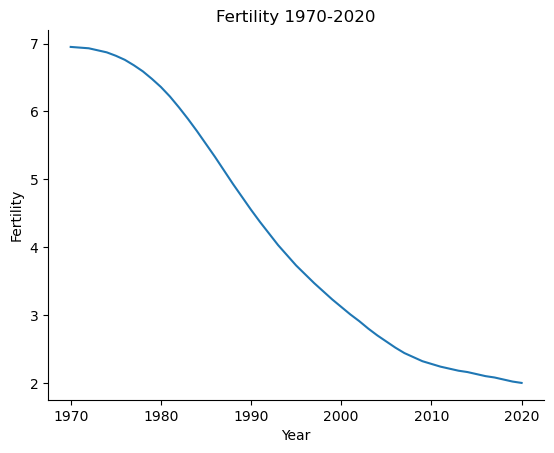

In [203]:
# Define data_over_time:
def data_over_time(country_code, start, end, df):
    new_df = df[(df['geo'] == country_code) & 
                   (df['time'] >= start) & 
                   (df['time'] <= end)]
    new_df = new_df.drop('geo', axis=1)
    return new_df

# Assign your plot to the the fertility_plot variable:
fig=plt.figure()
ax=fig.add_subplot(111)
fertility_df = data_over_time('bgd', 1970, 2020, fertility)
fertility_plot = ax.plot(fertility_df['time'], fertility_df['fertility'])

ax.set_xlabel('Year')
ax.set_ylabel('Fertility')
ax.spines[['top','right']].set_visible(False)
ax.set_title('Fertility 1970-2020')

In [204]:
grader.check("q1d")

q1d results: All test cases passed!

**Follow-up Question (ungraded)**: Does the trend in fertility help explain the declining population growth rate?


Yes, the decrease in fertility explains the decline in population.

### Question 1e (20 pts)
[Fertility is often correlated with child mortality](https://www.ageing.ox.ac.uk/download/143). This has been attributed to family planning: if parents can expect their children to survive into adulthood, then they choose to have fewer kids. Conversely, having fewer children may allow families to devote more resources to each child, reducing mortality.  

We can see if this association is operative in Bangladesh by plotting fertility rate and child mortality over time. Indeed, plotting all of the potential influencers of population that we are interested in (fertility, mortality, and life expectancy) might be informative. 


1. Using the `b-pop`, `fertility`, `child_mortality`, and `life_expectancy` DataFrames, create a new DataFrame, called `bgd_df` that contains the average population, fertility, child mortality, and life expectancy in Bangladesh over the time period 1970 through 1999 (inclusive of 1970 and 1999). Your `bgd_df` DataFrame should have this format:
    
|     | time    | population_total | life_expectancy | mortality | fertility |
| --- | ------- | ---------------- | --------------- | --------- | --------- |
|  0  |  1970   | 70093095.2       | 50.964          | 215.952   |  6.792    |
|  1  |  1971   |#                 |#                |#          |#          |
|  2  |  1972   |#                 |#                |#          |#          |

-  Ensure that you name the rows and columns exactly as they are shown here (and in the original DataFrames) for autograder purposes. It is fine if the order of the columns is different.
- **Hint**: You may want to use the `data_over_time` function you wrote in the previous question.
   <br>
    
2. Plot Bangladesh's population, life expectancy, child mortality, and fertility (in this order) over the time period 1970 to 1999 (inclusive). We have set up the subplots for you in the code cell below (plot population using the `ax1` axis handle, life expectancy using the `ax2` axis handle, etc.). Your final plot should look something like this: <br>

<img src="1e_plot.png">

Note that you are not required to remove the x ticks from the top 3 subplots, but doing so will reduce redundancy in your plot.
 

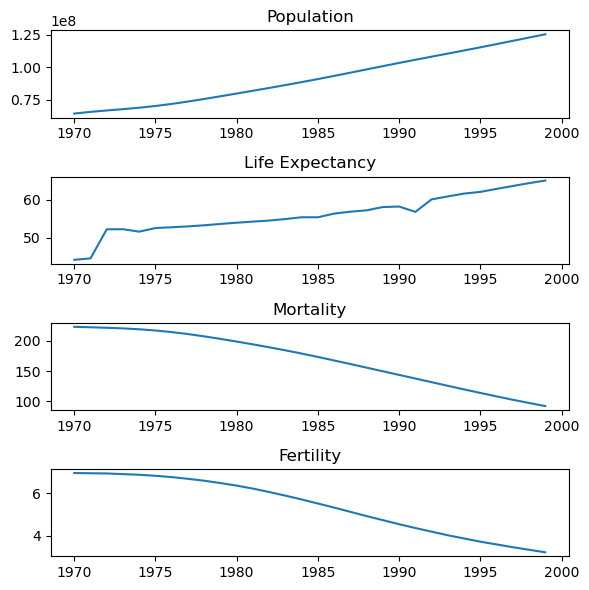

In [205]:
b_population = data_over_time('bgd', 1970, 1999, population)
b_life_expectancy = data_over_time('bgd', 1970, 1999, life_expectancy)
b_mortality = data_over_time('bgd', 1970, 1999, child_mortality)
b_fertility = data_over_time('bgd', 1970, 1999, fertility)

bgd_df = pd.DataFrame({
    'time' : b_population['time'],
    'population' : b_population['population_total'],
    'life_expectancy' : b_life_expectancy.groupby('time')['life_expectancy'].mean().values,
    'mortality' : b_mortality.groupby('time')['mortality'].mean().values,
    'fertility' : b_fertility.groupby('time')['fertility'].mean().values
})

fig1e = plt.figure()
fig1e.set_size_inches(6,6)
ax1 = fig1e.add_subplot(4,1,1)
ax2 = fig1e.add_subplot(4,1,2)
ax3 = fig1e.add_subplot(4,1,3)
ax4 = fig1e.add_subplot(4,1,4)

ax1.plot(bgd_df['time'], bgd_df['population'])
ax2.plot(bgd_df['time'], bgd_df['life_expectancy'])
ax3.plot(bgd_df['time'], bgd_df['mortality'])
ax4.plot(bgd_df['time'], bgd_df['fertility'])

ax1.set_title('Population')
ax2.set_title('Life Expectancy')
ax3.set_title('Mortality')
ax4.set_title('Fertility')


# This will clean up the spacing between your plots
fig1e.tight_layout()

In [206]:
grader.check("q1e")

q1e results: All test cases passed!

**Follow-up Ungraded Question**: 
How do population, life expectancy, mortality, and fertility correlate with one other? What conclusions can you make from this plot?

Although the fertility rates are decreasing, life expectancy is increasing and mortality rates are decreasing. This explains why the population is increasing.

### Question 1f: The World (10 pts)
The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Make a plot with two overlaid histograms, one for 1962 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

For at least one of the histograms, use `histtype=step` to make an unfilled histogram.

Assign you plot calls to the variables `fert_1962_plot` and  `fert_2010_plot`.

20.2


Text(0, 0.5, 'counts')

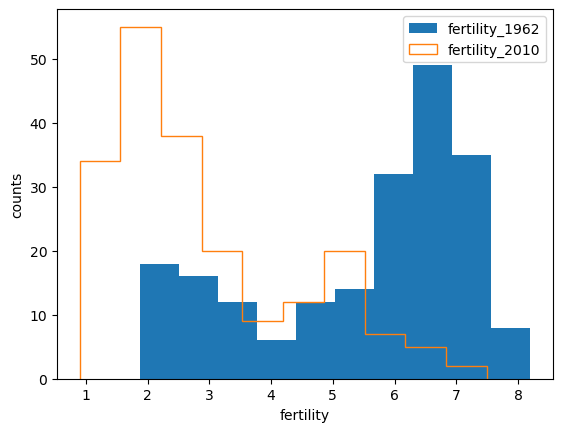

In [217]:
fig=plt.figure()
ax=fig.add_subplot(111)

# Assign your plot calls to these variables:
fertility_1962 = fertility[fertility['time'] == 1962]['fertility']
fertility_2010 = fertility[fertility['time'] == 2010]['fertility']

fert_1962_plot = plt.hist(fertility_1962, bins=10, orientation='vertical', label='fertility_1962')
fert_2010_plot = plt.hist(fertility_2010, bins=10, orientation='vertical', histtype='step', label='fertility_2010')

plt.legend(['fertility_1962', 'fertility_2010'])
plt.xlabel('fertility')
plt.ylabel('counts')

In [218]:
grader.check("q1f")

q1f results: All test cases passed!

## Question 1g (10 pts)
Use the `population` DataFrame and the `groupby` method to make a DataFrame named `world_pop` that has two columns:   
1. `time`, every year between 1800 and 2020.   
2. `population_total`, the world population for each year, calculated as sum of all of the countries' populations.   
  
You should use the `population` dataframe defined earlier in the project.   
  
Plot the world's population from 1800-2020 and assign the output of the plot command to `world_pop_plot`.


Text(0.5, 1.0, 'Population of the World 1800-2020')

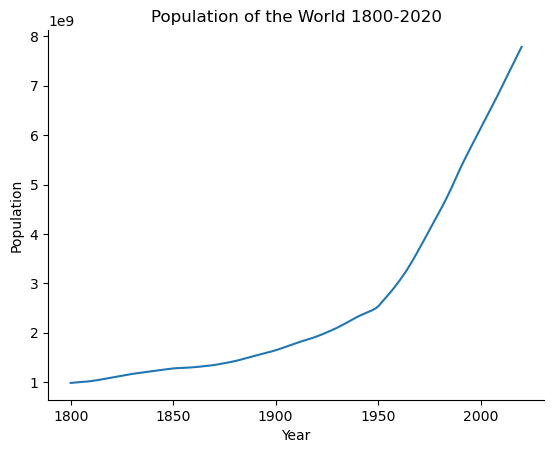

In [173]:
# Use groupby() on population dataframe to get the total world population for each year
world_pop = population.groupby('time').agg(population_total= ('population_total', 'sum'))

# Index world_pop for years <= 2020
world_pop = world_pop[0:221]
population_new = population[0:221]

# Plot world population from 1800-2020
# Assign your plot call to this variable:
fig=plt.figure()
ax=fig.add_subplot(111)
world_pop_plot = ax.plot(population_new['time'], world_pop['population_total'])
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.spines[['top','right']].set_visible(False)
ax.set_title('Population of the World 1800-2020')

In [174]:
grader.check("q1g")

q1g results: All test cases passed!

## Question 1h: Optional Challenge Question (No credit)
Visualize how population, life expectancy, mortality, and fertility have changed between the years 1900 and 2010 for the 6 countries that had the highest mean populations in 1970. Recreate the graph from question 1e (but extend the year range from 1900 to 2010 (inclusive)) and plot each of the 6 most populous countries' data as overlaid lines. The plot will look something like this: <br>

<img src="1h_plot.png" width="600" height="400">

**Follow-up Ungraded Question**: 
What trends do you notice? Are there any sharp peaks in one subplot that are correlated with sharp peaks in others? What world events do you think could help explain the data observed?

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)